# 量子テレポーテーション
アリスからボブへキュビット０の状態を転送

## ライブラリのインポート

In [1]:
from qiskit import IBMQ
from qiskit import QuantumCircuit
from qiskit import execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from numpy import pi

## 量子回路
３つのキュビットと１つのビットを用意する

In [2]:
# 回路を用意する。(キュビット0：送信するもの キュビット1とキュビット2：第3者が用意した持つれ状態のキュビット)
qc = QuantumCircuit(3, 1)

アリスがこれから転送するキュビット０用意

In [3]:
# RYゲートを追加する。
qc.ry(pi/3, 0)
# 回路を区切る。
qc.barrier(0,1,2);

回路の確認

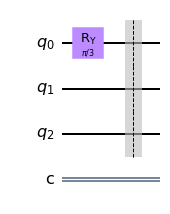

In [4]:
qc.draw(output='mpl')

ブロッフォ球で確認

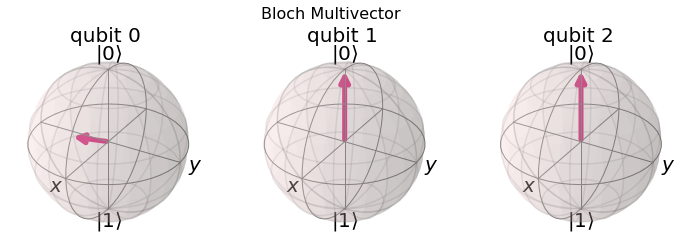

In [5]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state, title="Bloch Multivector")

確立（理論値）表示

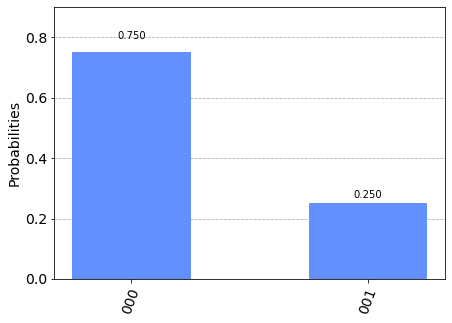

In [6]:
counts = state.probabilities_dict()
plot_histogram(counts)

第三者がキュビット１とキュビット２をもつれさせ、キュビッチ１をアリスへ渡し、キュビット２をボブに渡したことにする

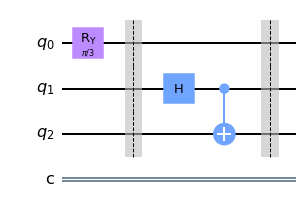

In [7]:
# 持つれ状態にする。(重ね合わせ＋CNOT)
qc.h(1)
qc.cx(1,2)
qc.barrier(0,1,2)
qc.draw(output='mpl')

アリスがキュビット０の状態を送信

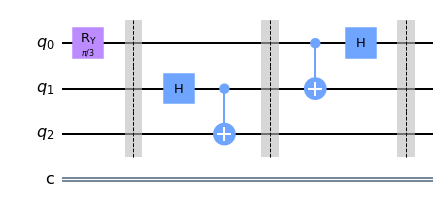

In [8]:
# 送信する。
# CNOTゲートを追加する。
qc.cx(0, 1)
# HADゲートを追加(重ね合わせ)
qc.h(0)
qc.barrier(0,1,2)
qc.draw(output='mpl')

ボブがアリスから得たキュビット０とキュビット１の情報をもとに、キュビット２を制御.

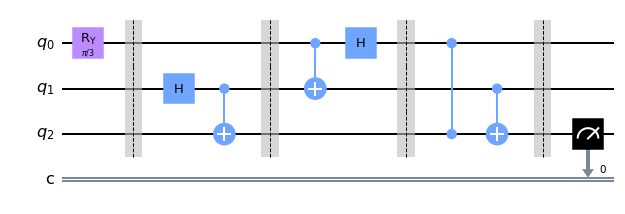

In [9]:
# CZゲート (制御ビットが1なら位相反転させる。)
qc.cz(0, 2)
# CNOTゲート (制御ビットが1なら反転させる。)
qc.cx(1, 2)
# 区切る。
qc.barrier(0,1,2)
#  測定する。
qc.measure(2,0)

qc.draw(output='mpl')

## 実行
試行数をshotsに指定してプログラムを量子コンピューターで実行

In [10]:
provider = IBMQ.load_account()
small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits == 5 and not x.configuration().simulator)
least_busy_backend = least_busy(small_devices)
print('Least Busy Backend:', least_busy_backend)

job = execute(qc, least_busy_backend, shots=200)
job_monitor(job)
result = job.result()

Least Busy Backend: ibmq_manila
Job Status: job has successfully run


## 結果の確認

結果からビットパターン毎に何回そのパターンとなったかという数を取得.

In [11]:
real_counts = result.get_counts(qc)
print(real_counts)

{'0': 135, '1': 65}


## ヒストグラムの表示
ビットパターン毎の集計結果を棒グラフで表示.

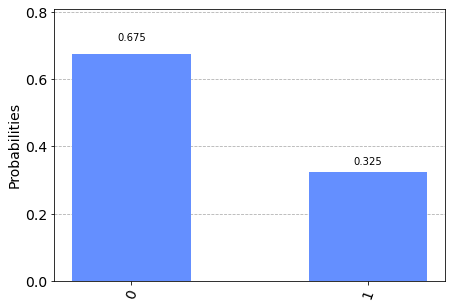

In [12]:
plot_histogram(real_counts)